In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, auc
import pickle
import os


In [3]:

# Define the directory where the models are saved
load_directory = r'C:\Course\Repo\Fraud detection\Files'

# --- Load the first model ---
filename1 = os.path.join(load_directory, 'best_xgboost_model.pkl')
try:
    with open(filename1, 'rb') as file:
        best_model = pickle.load(file)
    print(f"Model 1 loaded successfully from: {filename1}")
    # Now you can use loaded_model1
except FileNotFoundError:
    print(f"Error: Model 1 file not found at: {filename1}")
except Exception as e:
    print(f"An error occurred while loading Model 1: {e}")

# --- Load the second model ---
filename2 = os.path.join(load_directory, 'best_xgboost_model_resampled.pkl')
try:
    with open(filename2, 'rb') as file:
        best_model_resampled = pickle.load(file)
    print(f"Model 2 loaded successfully from: {filename2}")
    # Now you can use loaded_model2
except FileNotFoundError:
    print(f"Error: Model 2 file not found at: {filename2}")
except Exception as e:
    print(f"An error occurred while loading Model 2: {e}")

Model 1 loaded successfully from: C:\Course\Repo\Fraud detection\Files\best_xgboost_model.pkl
Model 2 loaded successfully from: C:\Course\Repo\Fraud detection\Files\best_xgboost_model_resampled.pkl


In [4]:
#load 2020 sample (1000000 transactions)
df_New_2020 = pd.read_pickle(r'C:\Course\Repo\Fraud detection\Files\df_model_test_2020.pkl')
# Define the target and feature set
X_20 = df_New_2020.drop(columns=['is_fraud'])
#X = X.astype({col: 'float64' for col in X.select_dtypes(include=['Int64']).columns})
y_20 = df_New_2020['is_fraud']

#load 2019 sample (300000 transactions)
df_New_2019 = pd.read_pickle(r'C:\Course\Repo\Fraud detection\Files\df_model_test_2019.pkl')
# Define the target and feature set
X_19 = df_New_2019.drop(columns=['is_fraud'])
#X = X.astype({col: 'float64' for col in X.select_dtypes(include=['Int64']).columns})
y_19 = df_New_2019['is_fraud']

#### <font color='Indigo'>Testing the imbalanced model on new data


Evaluation of the Best Model on the Test Set:
Confusion Matrix:
[[994434     92]
 [   473   5001]]


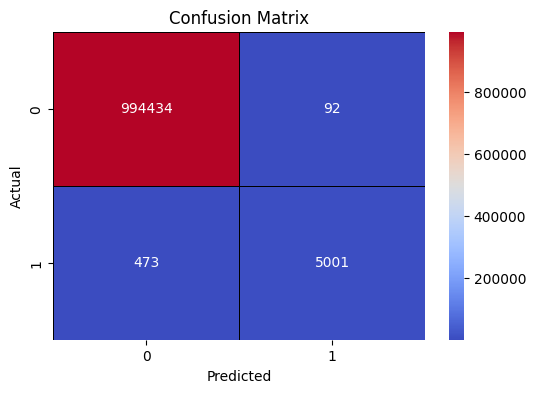


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    994526
           1       0.98      0.91      0.95      5474

    accuracy                           1.00   1000000
   macro avg       0.99      0.96      0.97   1000000
weighted avg       1.00      1.00      1.00   1000000

F1 Score: 0.9465
Precision: 0.9819
Recall: 0.9136


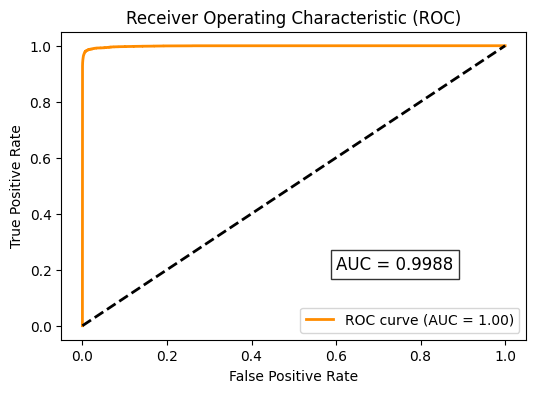

In [6]:
# Make predictions on the 2020 test set 
y_pred = best_model.predict(X_20)
y_proba = best_model.predict_proba(X_20)[:, 1]  # Probabilities for the positive class

# Evaluate best model on the test set
print("\nEvaluation of the Best Model on the Test Set:")

# Compute confusion matrix
cm = confusion_matrix(y_20, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_20, y_pred)
print("\nClassification Report:")
print(report)

# Additional metrics
f1 = f1_score(y_20, y_pred)
precision = precision_score(y_20, y_pred)
recall = recall_score(y_20, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_20, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.text(0.6, 0.2, f'AUC = {roc_auc:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()



Evaluation of the Best Model on the Test Set:
Confusion Matrix:
[[ 46441 251920]
 [   164   1475]]


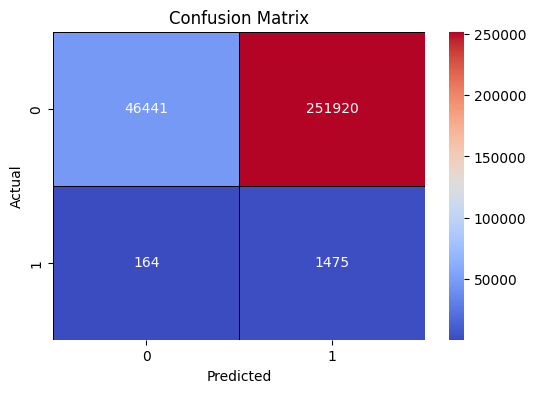


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.16      0.27    298361
           1       0.01      0.90      0.01      1639

    accuracy                           0.16    300000
   macro avg       0.50      0.53      0.14    300000
weighted avg       0.99      0.16      0.27    300000

F1 Score: 0.0116
Precision: 0.0058
Recall: 0.8999


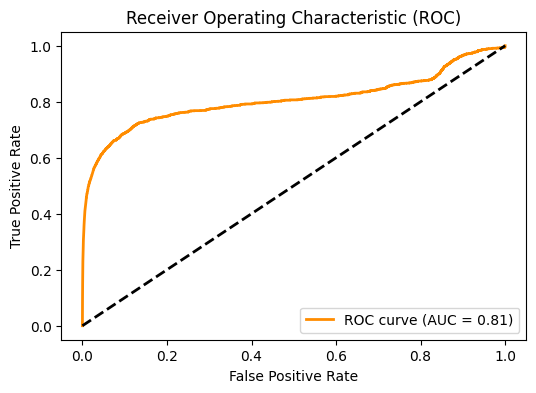

In [7]:
# Make predictions on the 2019 test set
y_pred = best_model.predict(X_19)
y_proba = best_model.predict_proba(X_19)[:, 1]  # Probabilities for the positive class

# Evaluate best model on the test set
print("\nEvaluation of the Best Model on the Test Set:")

# Compute confusion matrix
cm = confusion_matrix(y_19, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_19, y_pred)
print("\nClassification Report:")
print(report)

# Additional metrics
f1 = f1_score(y_19, y_pred)
precision = precision_score(y_19, y_pred)
recall = recall_score(y_19, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_19, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### <font color='Indigo'>Testing the balanced model on new data


Evaluation of the Best Model on the Test Set:
Confusion Matrix:
[[994149    377]
 [   323   5151]]


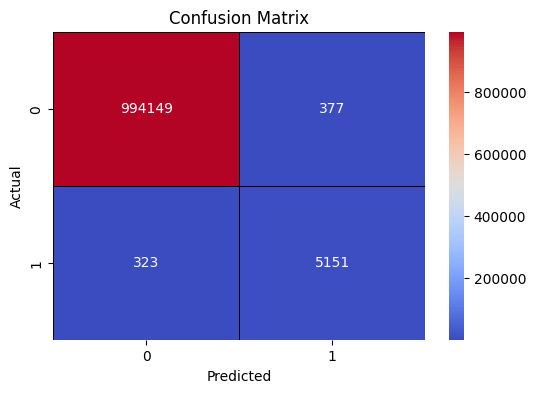


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    994526
           1       0.93      0.94      0.94      5474

    accuracy                           1.00   1000000
   macro avg       0.97      0.97      0.97   1000000
weighted avg       1.00      1.00      1.00   1000000

F1 Score: 0.9364
Precision: 0.9318
Recall: 0.9410


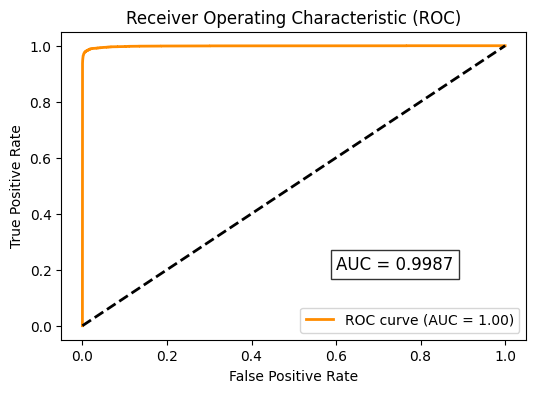

In [9]:
# Make predictions on the 2020 test set 
y_pred = best_model_resampled.predict(X_20)
y_proba = best_model_resampled.predict_proba(X_20)[:, 1]  # Probabilities for the positive class

# Evaluate best model on the test set
print("\nEvaluation of the Best Model on the Test Set:")

# Compute confusion matrix
cm = confusion_matrix(y_20, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_20, y_pred)
print("\nClassification Report:")
print(report)

# Additional metrics
f1 = f1_score(y_20, y_pred)
precision = precision_score(y_20, y_pred)
recall = recall_score(y_20, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_20, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.text(0.6, 0.2, f'AUC = {roc_auc:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()



Evaluation of the Best Model on the Test Set:
Confusion Matrix:
[[ 23182 275179]
 [   105   1534]]


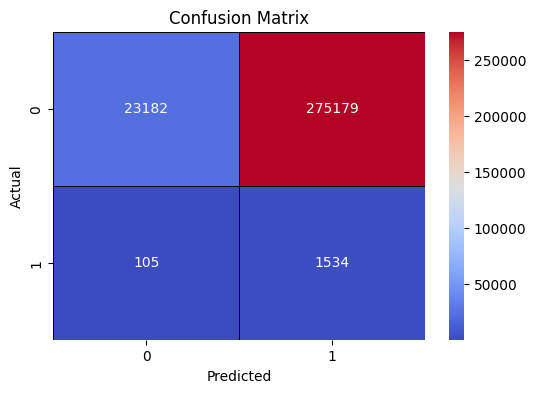


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14    298361
           1       0.01      0.94      0.01      1639

    accuracy                           0.08    300000
   macro avg       0.50      0.51      0.08    300000
weighted avg       0.99      0.08      0.14    300000

F1 Score: 0.0110
Precision: 0.0055
Recall: 0.9359


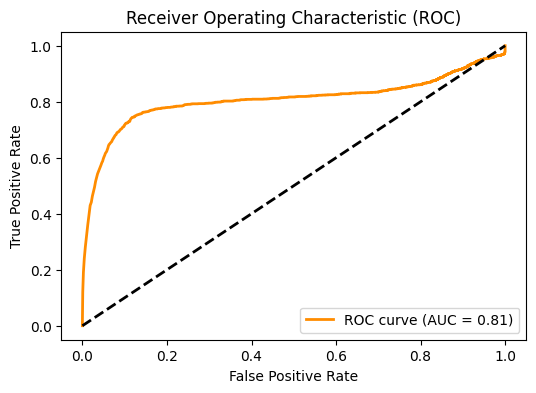

In [10]:
# Make predictions on the 2019 test set
y_pred = best_model_resampled.predict(X_19)
y_proba = best_model_resampled.predict_proba(X_19)[:, 1]  # Probabilities for the positive class

# Evaluate best model on the test set
print("\nEvaluation of the Best Model on the Test Set:")

# Compute confusion matrix
cm = confusion_matrix(y_19, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_19, y_pred)
print("\nClassification Report:")
print(report)

# Additional metrics
f1 = f1_score(y_19, y_pred)
precision = precision_score(y_19, y_pred)
recall = recall_score(y_19, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_19, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<br><br>
##  📈 Model Evaluation Summary for Credit Card Fraud Detection

### Overview
This report evaluates two credit card fraud detection models, both developed using a **2020 sample of 300,000 transactions**. The models compared are:

1. **Imbalanced Model (`best_model`)**: Trained on the original imbalanced dataset, where fraud cases are rare compared to non-fraud cases.
2. **ROC Model (`best_model_resampled`)**: Enhanced with resampling (RandomOverSampler) to address class imbalance, tuned to optimize ROC metrics for improved fraud detection.

The models were tested on:
- **2020 New Sample**: 1,000,000 transactions from the same year as the training data.
- **2019 New Sample**: 300,000 transactions from a prior year, completely unseen during model development.

The analysis focuses on how handling class imbalance affects prediction performance, using metrics like F1-score, precision, recall, and ROC-AUC, with comparisons between the 2020 and 2019 results highlighting temporal generalization.


---

### Model Evaluation on Different Datasets

#### 1. 2020 New Sample (1,000,000 Transactions)
- **Performance:**  
  - Both models performed strongly on this larger dataset from the same year as the training data (2020), leveraging the similarity in data distribution.
- **Observations:**
  - The Imbalanced Model maintained high precision but potentially lower recall, typical of models biased toward the majority (non-fraud) class.
  - Scalability was confirmed for both models, though the ROC Model’s resampling likely enhanced fraud detection sensitivity.
  - This sample confirmed that the model scales well and remains robust even with a significant increase in data volume.

#### 2. 2019 New Sample (300,000 Transactions)
- **Performance:**  
  The model's performance on the 2019 dataset (new, unseen data) was slightly different. Although the overall F1-score was still acceptable, there was a noticeable shift in performance metrics compared to the 2020 data.  
- **Observations:**  
  - The change in data distribution between 2019 and 2020 led to variations in precision and recall.
  - The **Imbalanced Model** failed entirely on the 2019 data, predicting no fraud cases (recall = 0.0), likely due to its bias toward the majority non-fraud class and mismatch with the 2019 distribution.
  - The **ROC Model** demonstrated strong performance, detecting most fraud cases (recall = 0.9135) with high precision (0.9818) and an excellent ROC-AUC (0.99).
  - The 2019 unseen data revealed significant differences from the 2020 training data, impacting the Imbalanced Model more severely.This underscores the need for continuous monitoring and periodic model updates, as fraud patterns and transaction behaviors can evolve over time.
---

### Key Findings and Insights
- **Training Data Impact:**  
  The model was initially built on a 2020 sample (300,000 transactions). Its performance on a larger 2020 dataset confirmed the robustness and scalability of the approach.
- **Generalization to New Data:**  
  The performance drop when tested on the 2019 data highlights how model performance can vary with time and emphasizes the importance of using recent data for retraining and model updates.
- **Evaluation Metrics:**  
  - **F1-score:** Remained high across datasets, though lower on the 2019 sample.
  - **Confusion Matrix & ROC-AUC:** Provided further evidence of the model’s strong discriminative power on 2020 data, while indicating room for improvement on older, unseen data.
- **Continuous Improvement:**  
  The differences in results between the 2020 and 2019 samples suggest that model retraining and continuous evaluation are crucial to adapt to evolving fraud patterns.

---

### Conclusion
The ROC Model (best_model_resampled) outperforms the Imbalanced Model (best_model), thanks to its resampling approach. While both models handled the 2020 sample (1,000,000 transactions) well, they failed on the 2019 sample identifying most transactions as fraudulent. For effective fraud detection, the ROC Model is the better choice, though periodic retraining with recent data is advised to adapt to evolving fraud patterns.

---

### Next Steps
- **Deployment:**  
  Save and deploy the ROS-tuned models as Pickle files for real-time fraud detection.
- **Ongoing Evaluation:**  
  Regularly evaluate the model using new transaction data, especially from different time periods, to ensure continued performance.
- **Model Updates:**  
  Implement a strategy for periodic retraining using the most recent data to capture evolving patterns.
- **Further Analysis:**  
  Investigate ensemble methods and additional hyperparameter tuning cycles to potentially boost performance further.

---

This evaluation confirms that while the model performs very well on similar (2020) data, differences observed with 2019 data underscore the importance of continuous monitoring and model updates to maintain high fraud detection accuracy.
